# Session #3 Homework

## Dataset

In this homework, we will continue the New York City Airbnb Open Data. You can take it from <a href='https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv'>Kaggle</a> or download from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'>here</a> if you don't want to sign up to Kaggle.

We'll keep working with the `price` variable, and we'll transform it to a classification task.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [3]:
!wget $data -O data.csv

--2021-09-27 09:18:39--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6,8M) [text/plain]
Saving to: 'data.csv'

     0K .......... .......... .......... .......... ..........  0%  632K 11s
    50K .......... .......... .......... .......... ..........  1% 1,76M 7s
   100K .......... .......... .......... .......... ..........  2%  971K 7s
   150K .......... .......... .......... .......... ..........  2% 2,32M 6s
   200K .......... .......... .......... .......... ..........  3% 1,05M 6s
   250K .......... .......... .......... .......... ..........  4% 2,34M 5s
   300K .......... .......... .......... .......... ..........  5% 4,66M 5s
   350K .......... .......... 

In [4]:
df = pd.read_csv(data)
df.shape

(48895, 16)

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Features

For the rest of the homework, you'll need to use the features from the previous homework with additional two `neighbourhood_group` and `room_type`. So the whole feature set will be set as follows:

* `neighbourhood_group`,
* `room_type`,
* `latitude`,
* `longitude`,
* `price`,
* `minimum_nights`,
* `number_of_reviews`,
* `reviews_per_month`,
* `calculated_host_listings_count`,
* `availability_365`

Select only them and fill in the missing values with 0.

In [6]:
features = [
    'neighbourhood_group',
    'room_type',
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

In [7]:
df = df[features]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


In [9]:
df.nunique()

neighbourhood_group                   5
room_type                             3
latitude                          19048
longitude                         14718
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [10]:
df.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
df = df.fillna(0)

In [12]:
df.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Question 1

What is the most frequent observation (mode) for the column `neighbourhood_group`?

In [13]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`price`) is not in your dataframe.

In [14]:
SEED = 42

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(df) == (len(df_train) + len(df_val) + len(df_test))

In [17]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

assert 'price' not in df_train.columns
assert 'price' not in df_val.columns
assert 'price' not in df_test.columns

## Question 2

* Create the correlation matrix for the numerical features of your train dataset.
    * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

In [20]:
df_train.corr()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.027441,-0.006246,-0.007159,0.019375,-0.005891
longitude,0.080301,1.000000,-0.060660,0.055084,0.134642,-0.117041,0.083666
minimum_nights,0.027441,-0.060660,1.000000,-0.076020,-0.120703,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.076020,1.000000,0.590374,-0.073167,0.174477
reviews_per_month,-0.007159,0.134642,-0.120703,0.590374,1.000000,-0.048767,0.165376
calculated_host_listings_count,0.019375,-0.117041,0.118647,-0.073167,-0.048767,1.000000,0.225913
availability_365,-0.005891,0.083666,0.138901,0.174477,0.165376,0.225913,1.000000


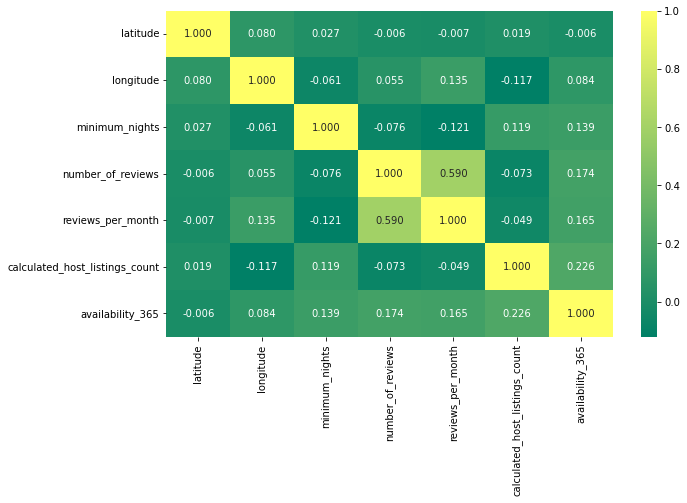

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.corr(), cmap="summer", annot=True, fmt='.3f');

## Make price binary

* We need to turn the price variable from numeric into binary.
* Let's create a variable `above_average` which is 1 if the price is above (or equal to) `152`.

In [22]:
def make_price_binary(price, value):
    func = lambda x: 1 if x >= value else 0
    price_binary = np.array(list(map(func, price)))
    return price_binary

In [23]:
y_train, y_val, y_test

(array([ 99,  57,  70, ..., 299,  65,  92], dtype=int64),
 array([ 65,  89, 200, ...,  39,  70,  77], dtype=int64),
 array([ 89,  30, 120, ...,  70, 500, 125], dtype=int64))

In [24]:
above_average_train = make_price_binary(y_train, 152)
above_average_val = make_price_binary(y_val, 152)
above_average_test = make_price_binary(y_test, 152)

In [25]:
above_average_train, above_average_val, above_average_test

(array([0, 0, 0, ..., 1, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 1, 0]))

## Question 3

* Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
* Which of these two variables has bigger score?
* Round it to 2 decimal digits using `round(score, 2)`

In [26]:
from sklearn.metrics import mutual_info_score

In [27]:
mi_neighbourhood_group = mutual_info_score(above_average_train, df_train.neighbourhood_group)
mi_room_type = mutual_info_score(above_average_train, df_train.room_type)

In [28]:
print(round(mi_neighbourhood_group, 2), round(mi_room_type, 2))

0.05 0.14


`room_type` has a bigger score.

## Question 4

* Now let's train a logistic regression
* Remember that we have two categorical variables in the data. Include them using one-hot encoding.
* Fit the model on the training dataset.
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    * `model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)`
* Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.

In [29]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [30]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [31]:
X_train.shape, above_average_train.shape, X_val.shape, above_average_val.shape

((29337, 15), (29337,), (9779, 15), (9779,))

In [32]:
model = LogisticRegression(solver='lbfgs', C=1.0, max_iter=1000, random_state=SEED)
model.fit(X_train, above_average_train)

LogisticRegression(max_iter=1000, random_state=42)

In [33]:
y_pred = model.predict_proba(X_val)[:, 1]

In [34]:
decision = (y_pred >= 0.5)

In [35]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = decision.astype(int)
df_pred['actual'] = above_average_val

In [36]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [37]:
original_score = df_pred.correct.mean()
print(f'Accuracy = {round(original_score, 2)}')

Accuracy = 0.79


## Question 5

* We have 9 features: 7 numerical features and 2 categorical.
* Let's find the least useful one using the _feature elimination_ technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
    * `neighbourhood_group`
    * `room_type`
    * `number_of_reviews`
    * `reviews_per_month`
> **note:** the difference doesn't have to be positive

In [38]:
columns = df_train.columns.to_list()
columns

['neighbourhood_group',
 'room_type',
 'latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [39]:
scores = pd.DataFrame()
for feature in columns:
    df_train_cut = df_train.copy()
    df_val_cut = df_val.copy()
    
    df_train_cut = df_train_cut.drop(columns={feature})
    df_val_cut = df_val_cut.drop(columns={feature})
    
    dv_cut = DictVectorizer(sparse=False)
    train_dict_cut = df_train_cut.to_dict(orient='records')
    X_train_cut = dv_cut.fit_transform(train_dict_cut)
    val_dict_cut = df_val_cut.to_dict(orient='records')
    X_val_cut = dv_cut.transform(val_dict_cut)
    
    model = LogisticRegression(solver='lbfgs', C=1.0, max_iter=1400, random_state=SEED)
    model.fit(X_train_cut, above_average_train)
    
    y_pred = model.predict_proba(X_val_cut)[:, 1] 
    prediction = (y_pred >= 0.5).astype(int)
    correct = (prediction == above_average_val)
    score = correct.mean()
    scores = scores.append({
        'eliminated_feature': feature,
        'accuracy': score, 
        'difference': abs(original_score - score)
    }, ignore_index=True)

In [40]:
scores

,eliminated_feature,accuracy,difference
0,neighbourhood_group,0.750997,0.039677
1,room_type,0.728704,0.061970
2,latitude,0.786890,0.003784
3,longitude,0.786993,0.003681
4,minimum_nights,0.791799,0.001125
5,number_of_reviews,0.791287,0.000614
6,reviews_per_month,0.790878,0.000205
7,calculated_host_listings_count,0.789447,0.001227
8,availability_365,0.781368,0.009306


In [41]:
min_diff = scores.difference.min()
scores[scores.difference == min_diff]

,eliminated_feature,accuracy,difference
6,reviews_per_month,0.790878,0.000205


## Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

In [42]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [43]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)

In [44]:
y_train.shape, y_val.shape

((29337,), (9779,))

In [45]:
scores = {}
for alpha in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = mean_squared_error(y_val, y_pred, squared=False)
    scores[alpha] = round(score, 3)
    print(f'alpha = {alpha}:\t RMSE = {score}')

alpha = 0:	 RMSE = 0.4970735408645011
alpha = 0.01:	 RMSE = 0.4971173046190632
alpha = 0.1:	 RMSE = 0.49711832446943993
alpha = 1:	 RMSE = 0.49713953633200497
alpha = 10:	 RMSE = 0.4978866015876555


In [46]:
scores

{0: 0.497, 0.01: 0.497, 0.1: 0.497, 1: 0.497, 10: 0.498}

In [47]:
print(f'The smallest `alpha` is {min(scores, key=scores.get)}.')

The smallest `alpha` is 0.
